In [1]:
from dateutil.parser import parse
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns

In [2]:
df= pd.read_csv('Monthly_Performance.csv', parse_dates =['mth_reprt_prd'], index_col = 'mth_reprt_prd')
df.head(10)

,ln_seq_number,curr_actl_upb,curr_ln_delq_stas,ln_age,curr_int_rt
mth_reprt_prd,,,,,
2012-05-01,F112Q2008000,300000,0,0,3.875
2012-05-01,F112Q2008002,169000,0,0,4.250
2012-05-01,F112Q2008003,357000,0,0,3.625
2012-05-01,F112Q2008004,417000,0,0,4.000
2012-05-01,F112Q2008006,409000,0,0,4.125
2012-05-01,F112Q2008007,400000,0,0,4.000
2012-05-01,F112Q2008008,352000,0,0,4.000
2012-05-01,F112Q2008010,90000,0,0,4.125
2012-05-01,F112Q2008011,237000,0,0,3.875


In [3]:
df.dtypes

ln_seq_number         object
curr_actl_upb          int64
curr_ln_delq_stas      int64
ln_age                 int64
curr_int_rt          float64
dtype: object

In [5]:
df.corr()

,curr_actl_upb,curr_ln_delq_stas,ln_age,curr_int_rt
curr_actl_upb,1.000000,-0.008934,-0.112715,-0.100314
curr_ln_delq_stas,-0.008934,1.000000,0.009642,-0.000661
ln_age,-0.112715,0.009642,1.000000,-0.033133
curr_int_rt,-0.100314,-0.000661,-0.033133,1.000000


In [34]:
#df1 = df.groupby('mth_reprt_prd')['curr_ln_delq_stas'].sum()
#print(df1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



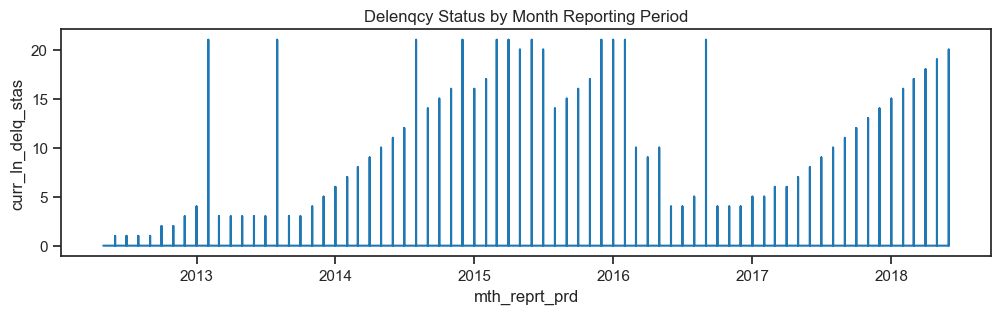

In [29]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='mth_reprt_prd', ylabel='curr_ln_delq_stas', dpi=100):
    plt.figure(figsize=(12,3), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.curr_ln_delq_stas, title='Delenqcy Status by Month Reporting Period') 

In [30]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.curr_ln_delq_stas.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.curr_ln_delq_stas.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -72.25295652704432
p-value: 0.0
Critial Values:
   1%, -3.43037290846507
Critial Values:
   5%, -2.861550125255146
Critial Values:
   10%, -2.5667753893063745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning:

p-value is smaller than the indicated p-value




KPSS Statistic: 5.336390
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Text(0.5, 1.0, 'Current Loan Delquency Status')

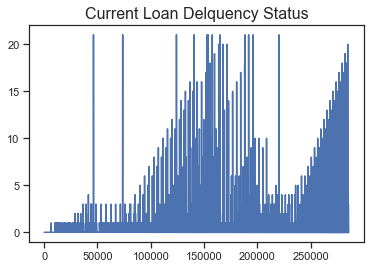

In [31]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df.curr_ln_delq_stas.values)
plt.plot(detrended)
plt.title('Current Loan Delquency Status', fontsize=16)

In [33]:
df.describe(include = 'all')

,ln_seq_number,curr_actl_upb,curr_ln_delq_stas,ln_age,curr_int_rt
count,285506,285506.000000,285506.000000,285506.000000,285506.000000
unique,4999,NaN,NaN,NaN,NaN
top,F112Q2008499,NaN,NaN,NaN,NaN
freq,148,NaN,NaN,NaN,NaN
mean,NaN,200762.896717,0.011072,32.563554,4.018705
std,NaN,111137.760940,0.299548,20.944889,0.222041
min,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,115624.000000,0.000000,14.000000,3.875000
50%,NaN,178130.000000,0.000000,31.000000,4.000000
75%,NaN,268146.750000,0.000000,50.000000,4.125000


In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot

In [38]:
df1 = pd.pivot_table(df, values ='curr_ln_delq_stas', index ='mth_reprt_prd')
print(df1)

               curr_ln_delq_stas
mth_reprt_prd                   
2012-05-01              0.000000
2012-06-01              0.000206
2012-07-01              0.003935
2012-08-01              0.001574
2012-09-01              0.001184
...                          ...
2018-02-01              0.017180
2018-03-01              0.021238
2018-04-01              0.019565
2018-05-01              0.019751
2018-06-01              0.019926

[74 rows x 1 columns]


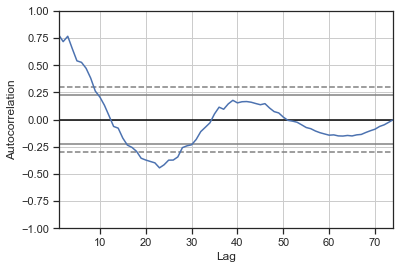

In [39]:
autocorrelation_plot(df1)
plt.show()

In [40]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                              ARIMA Model Results                              
Dep. Variable:     D.curr_ln_delq_stas   No. Observations:                   73
Model:                 ARIMA(12, 1, 0)   Log Likelihood                 316.260
Method:                        css-mle   S.D. of innovations              0.003
Date:                 Thu, 14 Nov 2019   AIC                           -604.520
Time:                         18:14:19   BIC                           -572.453
Sample:                     06-01-2012   HQIC                          -591.741
                          - 06-01-2018                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0003      0.000      0.890      0.377      -0.000       0.001
ar.L1.D.curr_ln_delq_stas     -0.6652      0.117     -5.700      0.000     

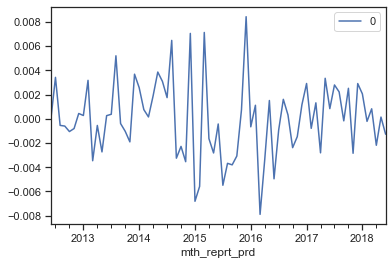

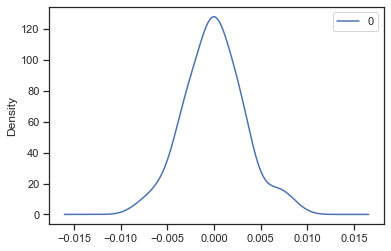

               0
count  73.000000
mean    0.000009
std     0.003160
min    -0.007891
25%    -0.002187
50%    -0.000074
75%     0.001898
max     0.008425


In [49]:
model = ARIMA(df1, order =(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind ='kde')
plt.show()
print(residuals.describe())

predicted=0.012324, expected=0.012099
predicted=0.010781, expected=0.006843
predicted=0.005545, expected=0.007819
predicted=0.009193, expected=0.013470
predicted=0.010132, expected=0.009507
predicted=0.008977, expected=0.005747
predicted=0.011019, expected=0.006150
predicted=0.008117, expected=0.007477
predicted=0.005335, expected=0.007595
predicted=0.006502, expected=0.006371
predicted=0.007445, expected=0.011214
predicted=0.009455, expected=0.008080
predicted=0.007957, expected=0.010770
predicted=0.011220, expected=0.009247
predicted=0.009791, expected=0.011714
predicted=0.010854, expected=0.014517
predicted=0.012476, expected=0.012996
predicted=0.013177, expected=0.016603
predicted=0.016422, expected=0.014649
predicted=0.015094, expected=0.017939
predicted=0.017465, expected=0.019210
predicted=0.018006, expected=0.017180
predicted=0.018538, expected=0.021238
predicted=0.020933, expected=0.019565
predicted=0.019458, expected=0.019751
predicted=0.021046, expected=0.019926
Test MSE: 0.

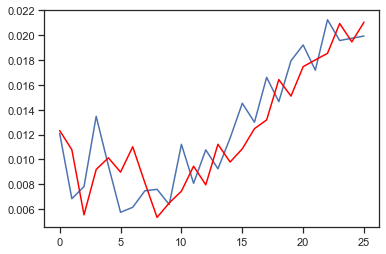

In [42]:
from sklearn.metrics import mean_squared_error

X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [45]:
df.corr()

,curr_actl_upb,curr_ln_delq_stas,ln_age,curr_int_rt
curr_actl_upb,1.000000,-0.008934,-0.112715,-0.100314
curr_ln_delq_stas,-0.008934,1.000000,0.009642,-0.000661
ln_age,-0.112715,0.009642,1.000000,-0.033133
curr_int_rt,-0.100314,-0.000661,-0.033133,1.000000


In [46]:
df['Year']=df.index.year
df['Month'] =df.index.month

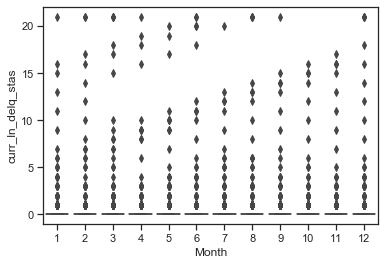

In [47]:
sns.boxplot(data=df, x='Month', y='curr_ln_delq_stas')

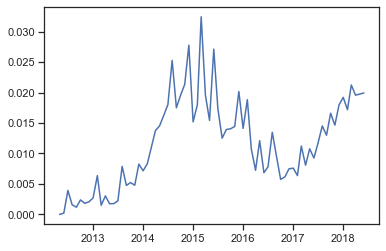

In [48]:
plt.plot(df1)